# 실습과제

## 아래 데이터를 이용하여 각 항목별 연관 관계를 분석하고 선형 회귀 분석 기법을 통해 상관 관계를 그래프로 표시하시오.

In [142]:
# 모듈 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [143]:
# 데이터 준비
data = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017, 2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]}

df = pd.DataFrame(data)

- year: 년도
- month: 월
- interest_rate: 이자율
- unemployment_rate: 실업률
- index_price: 물가지수

### 물가지수와 이자율 산점도 및 선형 회귀 분석

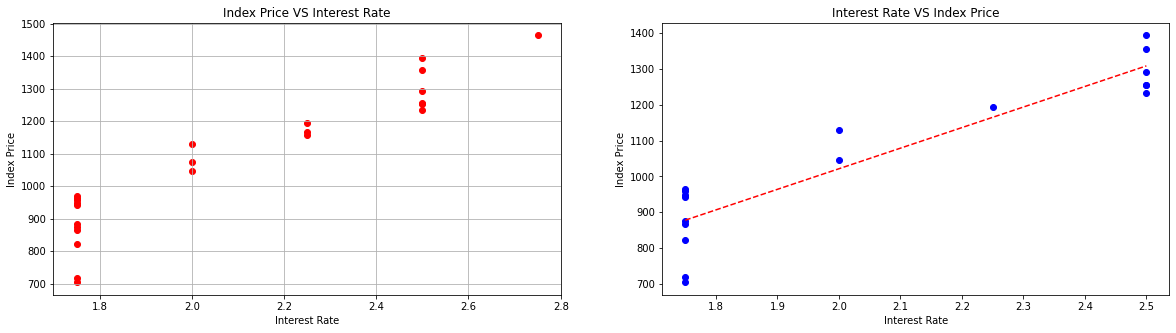

Index Price VS Interest Rate
coef_:[[574.45637584]], intercept_:[-127.38255034]

train data score: 0.8541859618501457
train data score: 0.9418923929450573


In [144]:
# 비교할 변수를 input과 target으로 잡음
input=df[['interest_rate']]
target=df[['index_price']]
train_input,test_input,train_target,test_target=train_test_split(input,target,random_state=42)

# 선형회귀 모델
lr=LinearRegression()
lr.fit(train_input,train_target)

# 물가지수와 이자율의 산점도
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.scatter(input,target,color='red')
plt.grid(axis='both')
plt.title('Index Price VS Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')

# 산점도에 회귀식 추가
plt.subplot(122)
plt.scatter(train_input,train_target,color='blue')
plt.plot([1.75,2.5],[min(lr.predict(train_input)),max(lr.predict(train_input))],color='red',linestyle='--')
plt.title('Interest Rate VS Index Price')
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.show()

# 절편/계수/정확도
print(f'''Index Price VS Interest Rate
coef_:{lr.coef_}, intercept_:{lr.intercept_}\n''')
print(f"train data score: {lr.score(train_input,train_target)}")
print(f"train data score: {lr.score(test_input,test_target)}")

### 물가지수와 이자율의 다항회귀

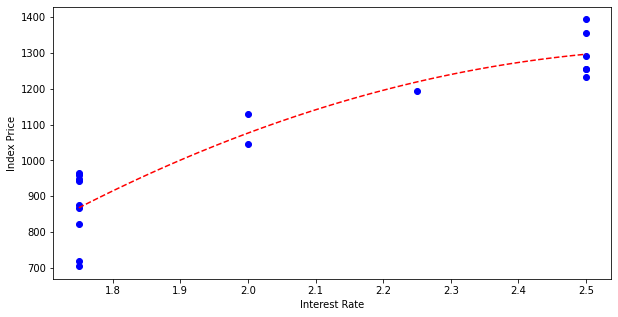

이자율과 물가지수 다항 회귀
다항 회귀 coef_:[[-524.84946237 2802.42473118]], intercept_[-2429.10282258]

다항 회귀 train data score: 0.8676269364555872
다항 회귀 test data score: 0.7945265214367347


In [145]:
# 다항회귀 데이터 준비
train_poly=np.column_stack((train_input**2,train_input))
test_poly=np.column_stack((test_input**2,test_input))

# 다항회귀 모델 만들기
lr=LinearRegression()
lr.fit(train_poly,train_target)

# 산점도에 다항 회귀식 추가
point=np.arange(1.75,2.51,0.01)
plt.figure(figsize=(10,5))
plt.scatter(train_input,train_target,color='blue')
plt.plot(point,-524.84946237*(point**2)+2802.42473118*point-2429.10282258,color='red',linestyle='--')
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.show()

# 절편/계수/정확도
print(f"""이자율과 물가지수 다항 회귀
다항 회귀 coef_:{lr.coef_}, intercept_{lr.intercept_}\n""")
print(f"다항 회귀 train data score: {lr.score(train_poly,train_target)}")
print(f"다항 회귀 test data score: {lr.score(test_poly,test_target)}")

### 실업률과 물가지수 산점도 및 선형 회귀 분석

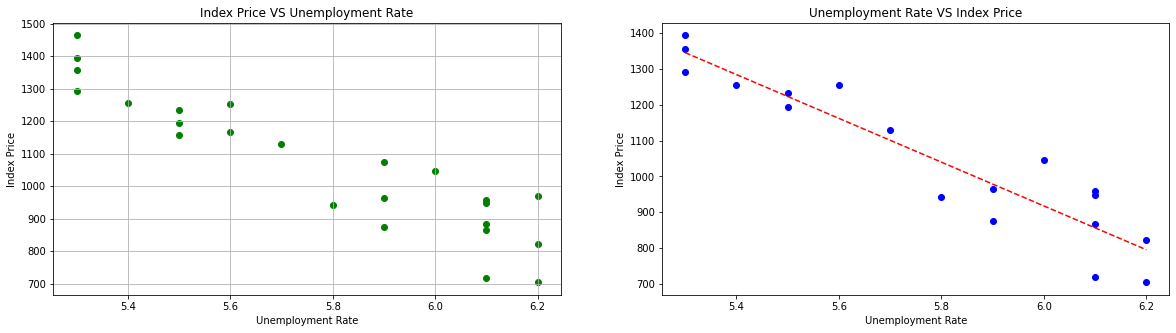

Index Price VS Unemployment Rate
coef_:[[-611.41330166]], intercept_:[4586.05463183]

train data score: 0.8748908875163574
train data score: 0.7074751133772279


In [ ]:
# 비교할 변수를 input과 target으로 잡음
input=df[['unemployment_rate']]
target=df[['index_price']]
train_input,test_input,train_target,test_target=train_test_split(input,target,random_state=42)

# 선형회귀 모델
lr=LinearRegression()
lr.fit(train_input,train_target)

# 물가지수와 이자율의 산점도
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.scatter(input,target,color='green')
plt.grid(axis='both')
plt.title('Index Price VS Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Index Price')

# 산점도에 회귀식 추가
plt.subplot(122)
plt.scatter(train_input,train_target,color='blue')
plt.plot([5.3,6.2],[max(lr.predict(train_input)),min(lr.predict(train_input))],color='red',linestyle='--')
plt.title('Unemployment Rate VS Index Price')
plt.xlabel('Unemployment Rate')
plt.ylabel('Index Price')
plt.show()

# 절편/계수/정확도
print(f'''Index Price VS Unemployment Rate
coef_:{lr.coef_}, intercept_:{lr.intercept_}\n''')
print(f"train data score: {lr.score(train_input,train_target)}")
print(f"train data score: {lr.score(test_input,test_target)}")

### 실업률과 물가지수의  다항 회귀분석

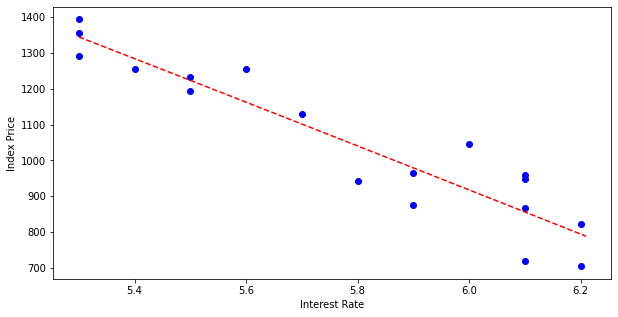

실업률과 물가지수 다항 회귀
다항 회귀 coef_:[[  -7.26428138 -527.97932022]], intercept_[4347.24819711]

다항 회귀 train data score: 0.8748971920999006
다항 회귀 test data score: 0.7057073065929044


In [ ]:
# 다항회귀 데이터 준비
train_poly=np.column_stack((train_input**2,train_input))
test_poly=np.column_stack((test_input**2,test_input))

# 다항회귀 모델 만들기
lr=LinearRegression()
lr.fit(train_poly,train_target)

# 산점도에 다항 회귀식 추가
point=np.arange(5.3,6.21,0.01)
plt.figure(figsize=(10,5))
plt.scatter(train_input,train_target,color='blue')
plt.plot(point,-7.26428138*(point**2)-527.97932022*point+4347.24819711,color='red',linestyle='--')
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')
plt.show()

# 절편/계수/정확도
print(f"""실업률과 물가지수 다항 회귀
다항 회귀 coef_:{lr.coef_}, intercept_{lr.intercept_}\n""")
print(f"다항 회귀 train data score: {lr.score(train_poly,train_target)}")
print(f"다항 회귀 test data score: {lr.score(test_poly,test_target)}")